In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt
import DataHelper

e = DataHelper.eclass_data()

In [3]:
print('total number of pre responses:',e.get_buffy_pre().shape[0]+ + e.get_intro_pre().shape[0])
print('total number of post responses:', e.get_buffy_post().shape[0] + e.get_intro_post().shape[0])

print('total number of unique student IDs pre:', e.pre.anon_student_id.unique().shape)
print('total number of unique student IDs post:', e.post.anon_student_id.unique().shape)

print('total number of responses:', e.pre.shape[0] + e.post.shape[0])

total number of pre responses: 39579
total number of post responses: 31159
total number of unique student IDs pre: (35183,)
total number of unique student IDs post: (28198,)
total number of responses: 70738


# Figure 1 : Cumulative number of student responses to ECLASS

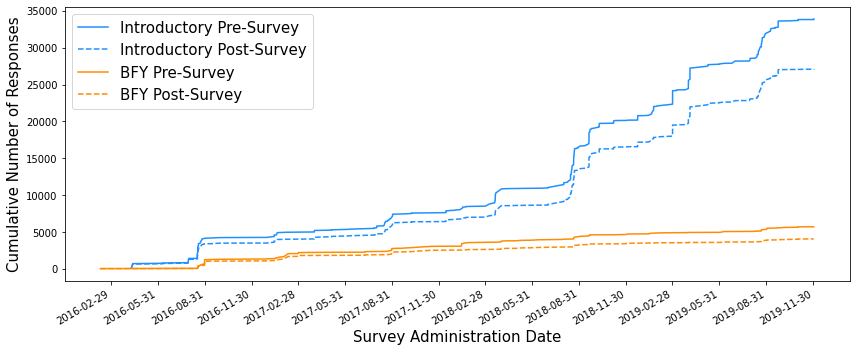

In [4]:
fig, ax = plt.subplots(figsize=(12, 5), sharex=True)

e.get_intro_pre().merge(e.get_cis_intro(), on='ResponseId').sort_values('StartDate').groupby('StartDate').count().anon_student_id.cumsum().plot(ax=ax, color='dodgerblue')

e.get_intro_post().merge(e.get_cis_intro(), on='ResponseId').sort_values('StartDate').groupby('StartDate').count().anon_student_id.cumsum().plot(ax=ax, color='dodgerblue', linestyle='--')

e.get_buffy_pre().merge(e.get_cis_buffy(), on='ResponseId').sort_values('StartDate').groupby('StartDate').count().anon_student_id.cumsum().plot(ax=ax, color='darkorange')

e.get_buffy_post().merge(e.get_cis_buffy(), on='ResponseId').sort_values('StartDate').groupby('StartDate').count().anon_student_id.cumsum().plot(ax=ax, color='darkorange', linestyle='--')

ax.set_xlabel('Survey Administration Date', fontsize=15)
ax.legend(['Introductory Pre-Survey', 'Introductory Post-Survey', 'BFY Pre-Survey', 'BFY Post-Survey'], fontsize=15)

ax.set_ylabel('Cumulative Number of Responses', rotation='vertical', fontsize=15)

e.get_cis()['StartDate'].min()
e.get_cis()['StartDate'].max()

xlabels = pd.date_range(e.get_cis()['StartDate'].min(), e.get_cis()['StartDate'].max(), freq='3M')

ax.set_xticks(xlabels,)
# ax.set_xticklabels(xlabels, rotation=0)

# ax.set_yscale('log')
# ax.set_ylim(1e0, 7e4)

fig.tight_layout()
fig.savefig('cum_responses.pdf')

# Table 1: Summary statistics describing differences in responses between intro and bfy

In [5]:
print('Number of courses survey offered as intro:', e.get_cis_intro().shape)
print('Number of courses survey offered as bfy:', e.get_cis_buffy().shape)

print('Number of unique universities offering intro:', e.get_cis_intro().anon_university_id.nunique())
print('Number of unique universities offering bfy:', e.get_cis_buffy().anon_university_id.nunique())
print('Number of unique universities:', e.get_cis().anon_university_id.nunique())

print('Number of unique instructors offering intro:', e.get_cis_intro().anon_instructor_id.nunique())
print('Number of unique instructors offering bfy:', e.get_cis_buffy().anon_instructor_id.nunique())
print('total unique instructors:', e.get_cis().anon_instructor_id.nunique())

print('Number of unique students in intro pre-responses:', e.get_intro_pre(unique_students=True).shape)
print('Number of unique students in intro post-responses:', e.get_intro_post(unique_students=True).shape)

print('Number of unique students in bfy pre-responses:', e.get_buffy_pre(unique_students=True).shape)
print('Number of unique students in bfy post-responses:', e.get_buffy_post(unique_students=True).shape)

print('Number of matched responses intro:', e.get_intro_matched().shape)
print('Number of matched responses bfy:', e.get_buffy_matched().shape)

Number of courses survey offered as intro: (289, 49)
Number of courses survey offered as bfy: (205, 49)
Number of unique universities offering intro: 66
Number of unique universities offering bfy: 75
Number of unique universities: 120
Number of unique instructors offering intro: 89
Number of unique instructors offering bfy: 96
total unique instructors: 165
Number of unique students in intro pre-responses: (29974, 66)
Number of unique students in intro post-responses: (24429, 111)
Number of unique students in bfy pre-responses: (5378, 66)
Number of unique students in bfy post-responses: (3858, 111)
Number of matched responses intro: (21321, 175)
Number of matched responses bfy: (3119, 175)


# Table 2: Demographic responses for ECLASS data set
## Gender

In [6]:
 e.get_intro_post().shape

(27112, 111)

In [7]:
print('unmatched')
print('intro gender:\n', e.get_intro_post().groupby('Q54').count().anon_student_id, '\nnot reported:\n', e.get_intro_post().isnull().sum(axis = 0).Q54)

print('bfy gender:\n', e.get_buffy_post().groupby('Q54').count().anon_student_id, '\nnot reported:\n', e.get_buffy_post().isnull().sum(axis = 0).Q54)

print('matched')
print('intro gender:\n', e.get_intro_matched().groupby('Q54').count().anon_student_id, '\nnot reported:\n', e.get_intro_matched().isnull().sum(axis = 0).Q54)

print('bfy gender:\n', e.get_buffy_matched().groupby('Q54').count().anon_student_id, '\nnot reported:\n', e.get_buffy_matched().isnull().sum(axis = 0).Q54)

unmatched
intro gender:
 Q54
1.0    11495
2.0    14757
3.0      252
Name: anon_student_id, dtype: int64 
not reported:
 608
bfy gender:
 Q54
1.0    1262
2.0    2621
3.0      62
Name: anon_student_id, dtype: int64 
not reported:
 102
matched
intro gender:
 Q54
1.0     9201
2.0    11461
3.0      196
Name: anon_student_id, dtype: int64 
not reported:
 463
bfy gender:
 Q54
1.0     976
2.0    2012
3.0      52
Name: anon_student_id, dtype: int64 
not reported:
 79


## Race

In [8]:
race_df = e.get_intro_post().copy()
race_df['multirace'] = race_df[['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown']].sum(axis=1)
race_df['multirace'] = race_df.multirace.apply(lambda x: 1 if x > 1 else 0)
race_df[['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown', 'multirace']]

questions = ['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown']

race_df.loc[race_df.multirace==1, questions] = np.nan

print('unmatched')
print('intro race:')
print(race_df[['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown', 'multirace']].sum())

unmatched
intro race:
Q52_1              67.0
Q52_2            5522.0
Q52_3            1615.0
Q52_4            1793.0
Q52_5              93.0
Q52_6           13708.0
Q52_7             551.0
race_unknown     1736.0
multirace        2027.0
dtype: float64


In [9]:
race_df = e.get_intro_matched().copy()
race_df['multirace'] = race_df[['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown']].sum(axis=1)
race_df['multirace'] = race_df.multirace.apply(lambda x: 1 if x > 1 else 0)
race_df[['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown', 'multirace']]

questions = ['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown']

race_df.loc[race_df.multirace==1, questions] = np.nan

print('matched')
print('intro race:')
print(race_df[['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown', 'multirace']].sum())

matched
intro race:
Q52_1              53.0
Q52_2            4356.0
Q52_3            1146.0
Q52_4            1403.0
Q52_5              70.0
Q52_6           11002.0
Q52_7             410.0
race_unknown     1268.0
multirace        1613.0
dtype: float64


In [10]:
race_df = e.get_buffy_post().copy()
race_df['multirace'] = race_df[['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown']].sum(axis=1)
race_df['multirace'] = race_df.multirace.apply(lambda x: 1 if x > 1 else 0)
race_df[['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown', 'multirace']]

questions = ['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown']

race_df.loc[race_df.multirace==1, questions] = np.nan

print('matched')
print('intro race:')
print(race_df[['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown', 'multirace']].sum())

matched
intro race:
Q52_1              8.0
Q52_2            792.0
Q52_3             93.0
Q52_4            178.0
Q52_5              5.0
Q52_6           2333.0
Q52_7            121.0
race_unknown     284.0
multirace        233.0
dtype: float64


In [11]:
race_df = e.get_buffy_matched().copy()
race_df['multirace'] = race_df[['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown']].sum(axis=1)
race_df['multirace'] = race_df.multirace.apply(lambda x: 1 if x > 1 else 0)
race_df[['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown', 'multirace']]

questions = ['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown']

race_df.loc[race_df.multirace==1, questions] = np.nan

print('matched')
print('intro race:')
print(race_df[['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown', 'multirace']].sum())

matched
intro race:
Q52_1              7.0
Q52_2            654.0
Q52_3             63.0
Q52_4            135.0
Q52_5              3.0
Q52_6           1772.0
Q52_7             90.0
race_unknown     219.0
multirace        176.0
dtype: float64


## majors

In [12]:
pd.DataFrame(
    {
        'intro major unmatched':e.get_intro_post(unique_students=True).groupby('Q47').count().anon_student_id
        ,'intro major matched':e.get_intro_matched(unique_students=True).groupby('Q47').count().anon_student_id
        ,'BFY major unmatched':e.get_buffy_post(unique_students=True).groupby('Q47').count().anon_student_id
        ,'BFY major matched':e.get_buffy_matched(unique_students=True).groupby('Q47').count().anon_student_id
    }
)

,intro major unmatched,intro major matched,BFY major unmatched,BFY major matched
Q47,,,,
0.0,5,3,3,2
1.0,1083,784,1798,1426
2.0,787,586,39,27
3.0,934,691,15,8
4.0,3611,2539,251,164
5.0,7309,5437,809,649
6.0,196,144,319,184
7.0,92,77,8,7
8.0,215,186,91,64


# Figure 2: plot comparing matched rates per survey

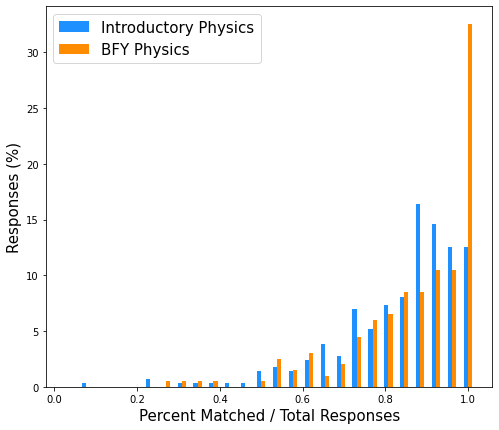

In [13]:
percent_matched = pd.DataFrame(
    {
        'intro preresponses': e.get_intro_pre(unique_students=True).groupby('ResponseId').count().anon_student_id
        ,'intro matched responses': e.get_intro_pre(unique_students=True).merge(e.get_intro_post(unique_students=True), how='outer', on=['anon_student_id', 'ResponseId',]).groupby('ResponseId').count().anon_student_id
        ,'bfy preresponses': e.get_buffy_pre(unique_students=True).groupby('ResponseId').count().anon_student_id
        ,'bfy matched responses': e.get_buffy_pre(unique_students=True).merge(e.get_buffy_post(unique_students=True), how='outer', on=['anon_student_id', 'ResponseId',]).groupby('ResponseId').count().anon_student_id
    }
)

percent_matched['intro percent'] = percent_matched['intro preresponses'] / percent_matched['intro matched responses']
percent_matched['bfy percent'] = percent_matched['bfy preresponses'] / percent_matched['bfy matched responses']

fig, ax = plt.subplots(figsize=(8, 7))

offset = 0.005
width = 0.01

h, edges = np.histogram(percent_matched['intro percent'], bins=26, range=(0, 1), density=False)
h = h/h.sum() * 100
ax.bar(x=edges[1:]-offset, height=h, width=width, color='dodgerblue', linewidth=3, label='Introductory Physics')

h, edges = np.histogram(percent_matched['bfy percent'], bins=26, range=(0, 1), density=False)
h = h/h.sum() * 100
ax.bar(x=edges[1:]+offset, height=h, width=width, color='darkorange', linewidth=3, label='BFY Physics')

ax.set_xlabel('Percent Matched / Total Responses', fontsize=15)
ax.set_ylabel('Responses (%)', fontsize=15)
ax.legend(fontsize=15)

fig.savefig('percentmatched.pdf', bbox_inches='tight')

100.0
100.0


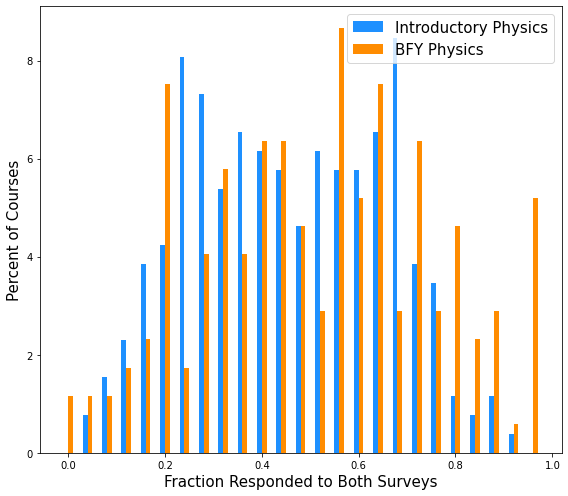

In [14]:
numerator_i = e.get_intro_pre(unique_students=True).merge(e.get_intro_post(unique_students=True), how='inner', on=['anon_student_id', 'ResponseId',]).groupby('ResponseId').count()[['anon_student_id']]

denominator_i = e.get_intro_pre(unique_students=True).merge(e.get_intro_post(unique_students=True), how='outer', on=['anon_student_id', 'ResponseId',]).groupby('ResponseId').count()[['anon_student_id']]

numerator_b = e.get_buffy_pre(unique_students=True).merge(e.get_buffy_post(unique_students=True), how='inner', on=['anon_student_id', 'ResponseId',]).groupby('ResponseId').count()[['anon_student_id']]

denominator_b = e.get_buffy_pre(unique_students=True).merge(e.get_buffy_post(unique_students=True), how='outer', on=['anon_student_id', 'ResponseId',]).groupby('ResponseId').count()[['anon_student_id']]

data_i = (numerator_i/denominator_i)
data_b = (numerator_b/denominator_b)

def get_hist(data):
    h, e = np.histogram(a=data, bins=np.linspace(0, 1, 26))
    return h, e

fig, ax = plt.subplots(figsize=(8, 7))

offset = 0.005
width = 0.01

h, edges = get_hist(data_i)
h = h/h.sum() * 100
ax.bar(x=edges[:-1]-offset, height=h, width=width, color='dodgerblue', linewidth=3, label='Introductory Physics')
print(h.sum())

h, edges = get_hist(data_b)
h = h/h.sum() * 100
ax.bar(x=edges[:-1]+offset, height=h, width=width, color='darkorange', linewidth=3, label='BFY Physics')
print(h.sum())

ax.set_xlabel('Fraction Responded to Both Surveys', fontsize=15)
ax.set_ylabel('Percent of Courses', fontsize=15)
ax.legend(fontsize=15)
# ax.set_xlim(0, 0.6)

fig.tight_layout()

fig.savefig('percentmatched.pdf', bbox_inches='tight')

# Table 3: Institutional descriptors table

In [15]:
e.get_cis_intro().groupby('Q15').mean()[['Q22_1', 'Q23', 'Q41']].transpose()

Q15,2 year college,4 year college,Master's granting institution,PhD granting institution
Q22_1,2.833333,2.873684,3.323529,2.365079
Q23,0.055556,0.361842,0.176471,0.063492
Q41,9.777778,9.578947,10.294118,8.761905


In [16]:
e.get_cis_intro().groupby('Q15').std()[['Q22_1', 'Q23', 'Q41']].transpose()

Q15,2 year college,4 year college,Master's granting institution,PhD granting institution
Q22_1,0.661438,0.814293,1.331014,0.696803
Q23,0.166667,0.741386,0.392953,0.245805
Q41,2.948634,2.626596,1.829095,4.149288


In [17]:
e.get_cis_buffy().groupby('Q15').mean()[['Q22_1', 'Q23', 'Q41']].transpose()

Q15,2 year college,4 year college,Master's granting institution,PhD granting institution
Q22_1,3.0,5.705814,3.000000,2.821429
Q23,0.0,2.511628,3.142857,0.750000
Q41,20.0,6.604651,7.857143,5.714286


In [18]:
e.get_cis_buffy().groupby('Q15').std()[['Q22_1', 'Q23', 'Q41']].transpose()

Q15,2 year college,4 year college,Master's granting institution,PhD granting institution
Q22_1,NaN,7.603259,0.816497,1.987220
Q23,NaN,2.846235,7.448234,1.423882
Q41,NaN,3.437465,3.436499,3.801705


In [19]:
# q22 = e.get_cis_intro().copy()
# q22.dropna(subset=['Q22_2'], inplace=True)
# q22 = q22[q22.Q22_2 != '`']
# q22['Q22_2'] = q22.Q22_2.astype(np.float64)
# q22.groupby('Q15').mean()[['Q22_1', 'Q23', 'Q41']].transpose()

In [20]:
# q22 = e.get_cis_buffy().copy()
# q22.dropna(subset=['Q22_2'], inplace=True)
# q22 = q22[q22.Q22_2 != '`']
# q22['Q22_2'] = q22.Q22_2.astype(np.float64)
# q22.groupby('Q15').mean()[['Q22_1', 'Q23', 'Q41']].transpose()

# Figure 3: Spearman corrleations for ECLASS survey

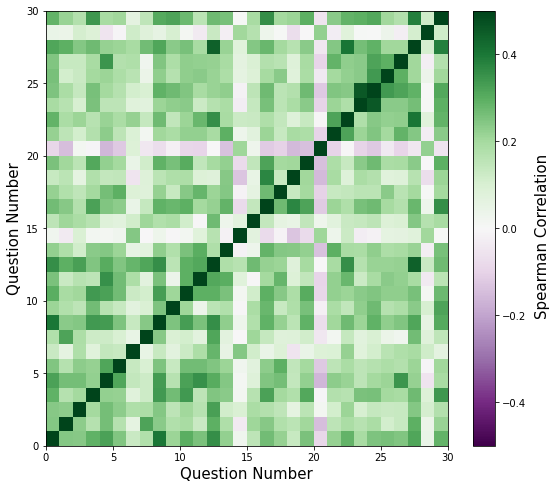

In [21]:
qids = [x for x in e.pre_survey_question_ids if 'a' in x]
z = e.get_pre(unique_students=True)[qids].corr('spearman').values

fig, ax = plt.subplots(figsize=(9, 8))

cbar = ax.pcolormesh(z, cmap='PRGn', vmin=-0.5, vmax=0.5)
# combined.corr('spearman').describe()

fig.colorbar(cbar)
fig.text(0.88, 0.35, 'Spearman Correlation', fontsize=15, rotation=90)

ax.set_xlabel('Question Number', fontsize=15)
ax.set_ylabel('Question Number', fontsize=15)
fig.savefig('precorr.pdf', bbox_inches='tight')

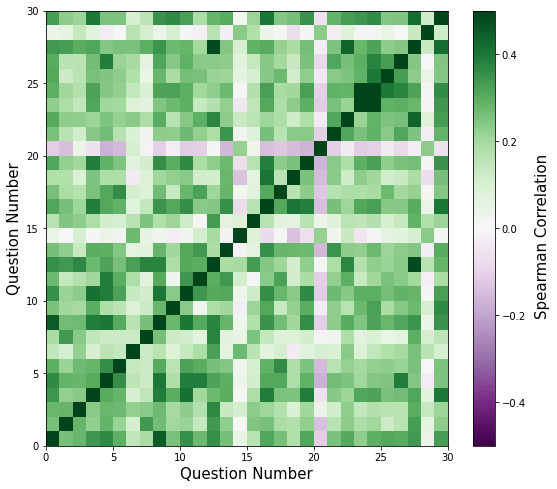

In [22]:
qids = [x for x in e.post_survey_question_ids if 'a' in x]
z = e.get_post(unique_students=True)[qids].corr('spearman').values

fig, ax = plt.subplots(figsize=(9, 8))

cbar = ax.pcolormesh(z, cmap='PRGn', vmin=-0.5, vmax=0.5)
# combined.corr('spearman').describe()

fig.colorbar(cbar)
fig.text(0.88, 0.35, 'Spearman Correlation', fontsize=15, rotation=90)

ax.set_xlabel('Question Number', fontsize=15)
ax.set_ylabel('Question Number', fontsize=15)
fig.savefig('postcorr.pdf', bbox_inches='tight')

# Figure 4: Skree plot for PCA of ECLASS survey

In [23]:
print('presurvey N:', e.get_pre(unique_students=True).shape[0])
print('post survey N:', e.get_post(unique_students=True).shape[0])

presurvey N: 35352
post survey N: 28287


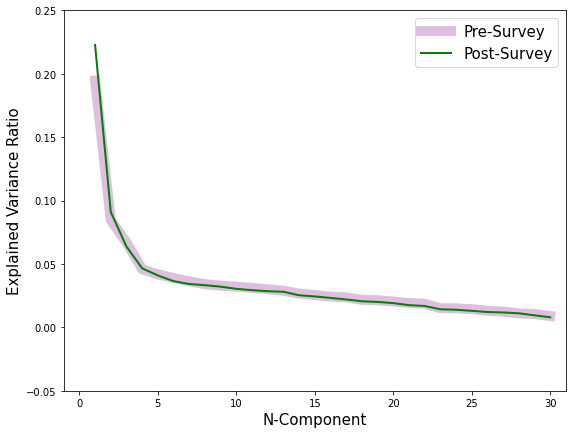

In [24]:
pca_pre = decomposition.PCA()
pca_post = decomposition.PCA()

pca_pre.fit(e.get_pre(unique_students=True)[qids].dropna().values)
pca_post.fit(e.get_post(unique_students=True)[qids].dropna().values)

fig, ax = plt.subplots(figsize=(9, 7))

x = np.arange(1, 31, 1)

ax.plot(x, pca_pre.explained_variance_ratio_, label='Pre-Survey', color='purple', linewidth=10, alpha=0.25)

ax.plot(x, pca_post.explained_variance_ratio_, label='Post-Survey', color='green', linewidth=2)

ax.set_ylabel('Explained Variance Ratio', fontsize=15)

ax.legend(loc='upper right', fontsize=15)

ax.set_xlim(-1, 31)
ax.set_ylim(-0.05, 0.25)
ax.set_xlabel('N-Component', fontsize=15)


fig.savefig('factoranalysis.pdf', bbox_inches='tight')

In [25]:
pca_pre.explained_variance_ratio_.cumsum()

array([0.19467646, 0.27911631, 0.34615763, 0.39205451, 0.43380227,
       0.47278517, 0.50910695, 0.5431278 , 0.57599737, 0.60812423,
       0.63926212, 0.66928971, 0.69819869, 0.72484246, 0.75032241,
       0.7745626 , 0.79824355, 0.81995454, 0.84135901, 0.86172614,
       0.88091811, 0.89953958, 0.91464498, 0.92966953, 0.94401502,
       0.95710204, 0.96953261, 0.98055053, 0.99106483, 1.        ])

In [26]:
pca_post.explained_variance_ratio_.cumsum()

array([0.2226042 , 0.3135346 , 0.37726511, 0.42383068, 0.46477409,
       0.50122089, 0.53538981, 0.56865096, 0.60074747, 0.63113974,
       0.66047552, 0.68900493, 0.71709182, 0.74242161, 0.76682147,
       0.7900674 , 0.8120866 , 0.83266438, 0.85273164, 0.87185494,
       0.88940573, 0.90628054, 0.92054966, 0.93448498, 0.94755129,
       0.95966543, 0.97142685, 0.98252858, 0.99204278, 1.        ])

# Figure 5: Eigenvalues of first three principal components

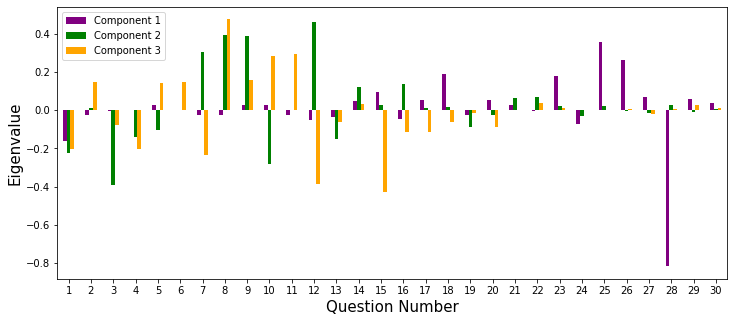

In [27]:
eigenvalues = pd.DataFrame(pca_pre.components_)
fig, ax = plt.subplots(figsize=(12, 5))
eigenvalues[[0, 1, 2]].plot.bar(ax=ax, color=['purple', 'green', 'orange'])
ax.legend(['Component 1', 'Component 2', 'Component 3'])
ax.set_xlabel('Question Number', fontsize=15)
ax.set_ylabel('Eigenvalue', fontsize=15)
ax.set_xticklabels(np.arange(1, 31, 1), rotation=0)
fig.savefig('first3components.pdf', bbox_inches='tight')